In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [290]:
#Read Data
pd.set_option('display.max_columns',500)
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [291]:
#Investigating and Analysing Missing Values
print(round(df.isnull().sum(axis=0)/len(df),6)*100)

SK_ID_CURR                     0.0000
TARGET                         0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER                    0.0000
FLAG_OWN_CAR                   0.0000
FLAG_OWN_REALTY                0.0000
CNT_CHILDREN                   0.0000
AMT_INCOME_TOTAL               0.0000
AMT_CREDIT                     0.0000
AMT_ANNUITY                    0.0039
AMT_GOODS_PRICE                0.0904
NAME_TYPE_SUITE                0.4201
NAME_INCOME_TYPE               0.0000
NAME_EDUCATION_TYPE            0.0000
NAME_FAMILY_STATUS             0.0000
NAME_HOUSING_TYPE              0.0000
REGION_POPULATION_RELATIVE     0.0000
DAYS_BIRTH                     0.0000
DAYS_EMPLOYED                  0.0000
DAYS_REGISTRATION              0.0000
DAYS_ID_PUBLISH                0.0000
OWN_CAR_AGE                   65.9908
FLAG_MOBIL                     0.0000
FLAG_EMP_PHONE                 0.0000
FLAG_WORK_PHONE                0.0000
FLAG_CONT_MOBILE               0.0000
FLAG_PHONE  

In [292]:
df=df.loc[:,df.isna().sum(axis=0)/len(df)<0.40]
df.shape

(307511, 73)

In [293]:
#Removing irrelevant columns
df=df.loc[:,:'ORGANIZATION_TYPE']
df=df.drop(['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
         'FLAG_CONT_MOBILE','FLAG_EMAIL','FLAG_PHONE'],axis=1)

In [294]:
print(round(df.isnull().sum(axis=0)/len(df),6)*100)

SK_ID_CURR                      0.0000
TARGET                          0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OCCUPATION_TYPE                31.3455
CNT_FAM_MEMBERS                 0.0007
REGION_RATING_CLIENT            0.0000
REGION_RATING_CLIENT_W_CITY     0.0000
REG_REGION_NOT_LIVE_REGION      0.0000
REG_REGION_NOT_WORK_REGIO

In [295]:
df.shape

(307511, 31)

In [296]:
#checking the datatypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH             

In [297]:
#finding the outlier in the dataset
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [298]:
df=df.drop(df[df['DAYS_EMPLOYED']==365243].index)
df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,0,0,0,School
2,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government
3,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion
5,100008,0,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Laborers,2.0,2,2,0,0,0,0,0,0,Other
6,100009,0,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,Accountants,3.0,2,2,0,0,0,0,0,0,Business Entity Type 3
7,100010,0,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,Managers,2.0,3,3,0,0,0,0,1,1,Other
9,100012,0,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,Laborers,1.0,2,2,0,0,0,0,0,0,Electricity
10,100014,0,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,-738,Core staff,3.0,2,2,0,0,0,0,0,0,Medicine


In [332]:
#finding outlier in CODE_GENDER
df['CODE_GENDER'].value_counts()

F      157177
M       94956
XNA         4
Name: CODE_GENDER, dtype: int64

In [337]:
df=df.drop(df[df['CODE_GENDER']=='XNA'].index)

In [338]:
df['AMT_CREDIT'].describe()

count    2.521330e+05
mean     6.114018e+05
std      4.065294e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [339]:
#Binning the AMT_CREDIT According to the Quartile and removing the outlier
l1= list(df['AMT_CREDIT'].quantile([0.25,0.5,0.75,0.99]).astype(int))
def Cat(x):
    if (x<=l1[0]):
        return 'Low'
    elif (x>l1[0]) & (x<=l1[1]):
        return 'Medium'
    elif (x>l1[1]) & (x<=l1[2]):
        return 'High'
    elif (x>l1[2]) & (x<=l1[3]):
        return 'Very_High'
    else:
        return 'Outlier'
df['Crd_Cat_Req'] = df['AMT_CREDIT'].apply(lambda x: Cat(x))

In [340]:
outlier_crd=df[df['Crd_Cat_Req']=='Outlier']
outlier

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_EMPLOYED_OUTLIER,Crd_Cat_Req
189,100219,0,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-11177,-1514.0,-64.0,-2793,Core staff,3.0,1,1,0,0,0,0,0,0,Business Entity Type 3,False,Outlier
337,100389,0,M,Y,Y,0,247500.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.006207,-14216,-365.0,-3183.0,-4423,Core staff,2.0,2,2,0,0,0,0,0,0,Self-employed,False,Outlier
341,100393,0,M,Y,Y,2,405000.0,2250000.0,59485.5,2250000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.007114,-14966,-6158.0,-954.0,-4979,Core staff,4.0,2,2,0,0,0,0,0,0,Police,False,Outlier
441,100508,0,F,Y,Y,0,450000.0,1971072.0,62019.0,1800000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.032561,-18268,-2569.0,-4292.0,-1699,Managers,2.0,1,1,0,0,0,0,0,0,Trade: type 3,False,Outlier
485,100559,0,F,Y,Y,0,450000.0,2286211.5,116266.5,2182500.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.018850,-20589,-13994.0,-5893.0,-4106,Core staff,2.0,2,2,0,0,0,0,0,0,Security Ministries,False,Outlier
639,100730,0,F,N,Y,1,315000.0,1971072.0,62019.0,1800000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-16938,-1744.0,-3240.0,-496,Accountants,3.0,1,1,0,0,0,0,0,0,Business Entity Type 1,False,Outlier
667,100771,0,M,N,Y,1,288000.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020246,-17087,-5171.0,-1166.0,-518,Managers,3.0,3,3,0,0,0,0,0,0,Industry: type 9,False,Outlier
678,100784,1,F,N,Y,0,54000.0,1885500.0,74191.5,1885500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.031329,-22181,NaN,-14266.0,-4714,NaN,2.0,2,2,0,0,0,0,0,0,XNA,True,Outlier
748,100861,0,M,N,N,0,306000.0,2085120.0,72477.0,1800000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-14206,-5632.0,-185.0,-4669,Private service staff,2.0,2,2,0,0,0,0,0,0,Other,False,Outlier
871,100999,0,M,Y,N,0,450000.0,2125953.0,81108.0,1984500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,With parents,0.072508,-10121,-1354.0,-1393.0,-2672,High skill tech staff,1.0,1,1,0,0,0,0,0,0,Business Entity Type 1,False,Outlier


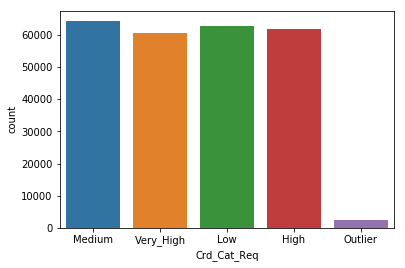

In [341]:
sns.countplot(x='Crd_Cat_Req',data=df)

In [342]:
#Binning the AMT_INCOME_TOTAL According to the Quartile and finding the outlier 
l1= list(df['AMT_INCOME_TOTAL'].quantile([0.25,0.5,0.75,0.995]).astype(int))
print(l1)

[112500, 157500, 211500, 675000]


In [343]:
df['Income_cat'] = df['AMT_INCOME_TOTAL'].apply(lambda x: Cat(x))

In [344]:
Outlier_Incm=df[df['Income_cat']=='Outlier']
Outlier_Incm

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Crd_Cat_Req,Income_cat
319,100366,0,M,Y,Y,0,765000.0,1350000.0,67500.0,1350000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.002506,-11788,-3144,-5643.0,-3962,Managers,1.0,2,2,0,0,0,1,1,0,Business Entity Type 3,Very_High,Outlier
1238,101461,0,M,Y,Y,0,810000.0,661500.0,37066.5,661500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.072508,-21766,-5065,-11148.0,-1374,Drivers,2.0,1,1,0,0,0,0,0,0,Business Entity Type 3,High,Outlier
1504,101769,0,M,Y,Y,0,1080000.0,180000.0,9000.0,180000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,-13633,-5536,-3.0,-4971,NaN,2.0,1,1,0,1,1,0,0,0,Business Entity Type 3,Low,Outlier
1586,101857,0,F,N,Y,0,720000.0,1125000.0,44617.5,1125000.0,Unaccompanied,Commercial associate,Higher education,Widow,House / apartment,0.046220,-21630,-1059,-13.0,-1726,NaN,1.0,1,1,1,0,1,1,1,1,Other,Very_High,Outlier
1644,101929,1,F,Y,Y,0,697500.0,450000.0,22500.0,450000.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-23299,-2550,-2591.0,-103,Medicine staff,2.0,1,1,0,0,0,0,0,0,Medicine,Medium,Outlier
2009,102356,0,M,Y,Y,1,765000.0,1350000.0,51552.0,1350000.0,Unaccompanied,Working,Incomplete higher,Separated,House / apartment,0.010643,-10186,-3012,-4912.0,-2857,NaN,2.0,2,2,0,1,1,0,0,0,Business Entity Type 3,Very_High,Outlier
2378,102782,0,F,N,Y,0,693000.0,835380.0,40320.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-10076,-1773,-4874.0,-2557,NaN,2.0,1,1,0,1,1,0,0,0,Business Entity Type 3,Very_High,Outlier
3209,103747,0,F,Y,Y,0,810000.0,900000.0,94509.0,900000.0,"Spouse, partner",Working,Higher education,Married,House / apartment,0.046220,-17420,-4215,-2907.0,-969,Sales staff,2.0,1,1,0,0,0,0,0,0,Self-employed,Very_High,Outlier
3287,103838,0,M,Y,Y,0,810000.0,630000.0,59035.5,630000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.046220,-10712,-1498,-4857.0,-3379,NaN,1.0,1,1,0,1,1,0,0,0,Business Entity Type 3,High,Outlier
3371,103938,0,F,N,N,1,1350000.0,2410380.0,109053.0,2250000.0,NaN,Commercial associate,Higher education,Married,House / apartment,0.072508,-12213,-843,-757.0,-4132,Managers,3.0,1,1,0,1,1,0,0,0,Housing,Outlier,Outlier


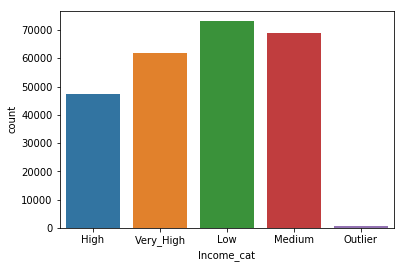

In [345]:
sns.countplot(x='Income_cat',data=df)

In [346]:
#Data Imbalance in the Target variable 
df['TARGET'].value_counts()

0    230298
1     21835
Name: TARGET, dtype: int64

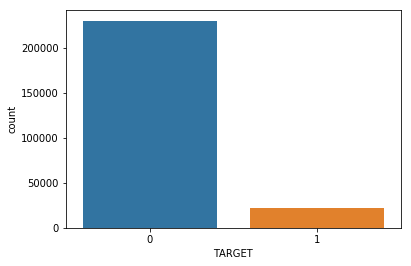

In [347]:
#plotting the Data imbalance in the Target variable 
sns.countplot(x='TARGET',data=df)

In [348]:
# Segementing the value og Taget variable
Tg_0=df[df['TARGET']==0]
Tg_1=df[df['TARGET']==1]

In [349]:
# Imbalance Percentage
print((len(Tg_0)-len(Tg_1))/len(Tg_0)*100)

90.51880606865886


In [350]:
Tg_0

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Crd_Cat_Req,Income_cat
1,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,0,0,0,School,Very_High,Very_High
2,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,Low,Low
3,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,Medium,Medium
4,100007,0,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,Medium,Medium
5,100008,0,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Laborers,2.0,2,2,0,0,0,0,0,0,Other,Medium,Low
6,100009,0,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,Accountants,3.0,2,2,0,0,0,0,0,0,Business Entity Type 3,Very_High,High
7,100010,0,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,Managers,2.0,3,3,0,0,0,0,1,1,Other,Very_High,Very_High
9,100012,0,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,Laborers,1.0,2,2,0,0,0,0,0,0,Electricity,Medium,Medium
10,100014,0,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,-738,Core staff,3.0,2,2,0,0,0,0,0,0,Medicine,High,Low
12,100016,0,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-13439,-2717,-311.0,-3227,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 2,Low,Low


In [353]:
# lets define a function to plot across categorical variables
def plot_cat(varx,vary):
    sns.barplot(x=varx, y=vary, data=Tg_0,ci=False)
    plt.show()

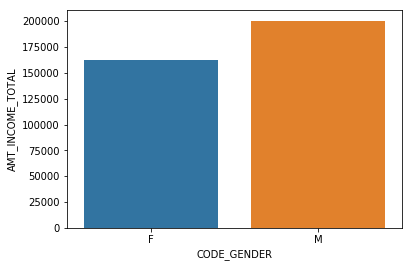

In [354]:
plot_cat('CODE_GENDER','AMT_INCOME_TOTAL')

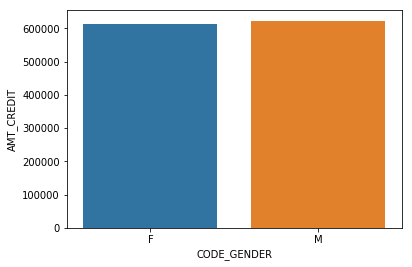

In [356]:
plot_cat('CODE_GENDER','AMT_CREDIT')

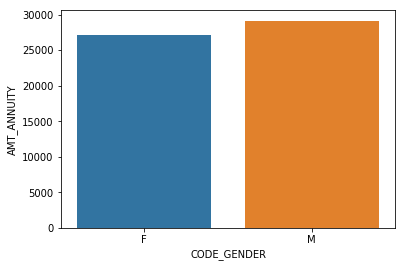

In [357]:
plot_cat('CODE_GENDER','AMT_ANNUITY')

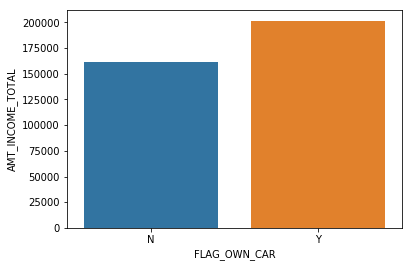

In [358]:
plot_cat('FLAG_OWN_CAR','AMT_INCOME_TOTAL')

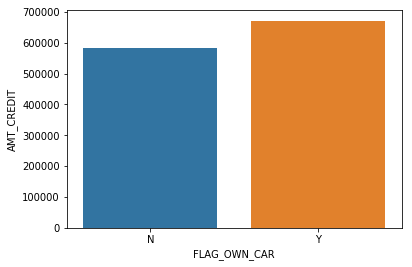

In [360]:
plot_cat('FLAG_OWN_CAR','AMT_CREDIT')

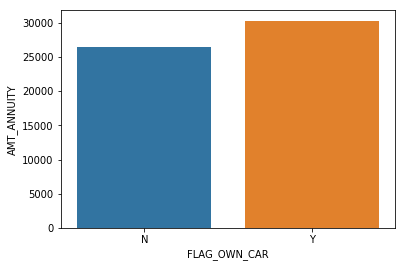

In [362]:
plot_cat('FLAG_OWN_CAR','AMT_ANNUITY')

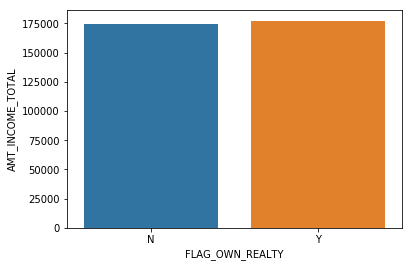

In [365]:
plot_cat('FLAG_OWN_REALTY','AMT_INCOME_TOTAL')

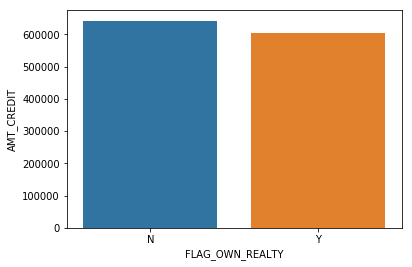

In [366]:
plot_cat('FLAG_OWN_REALTY','AMT_CREDIT')

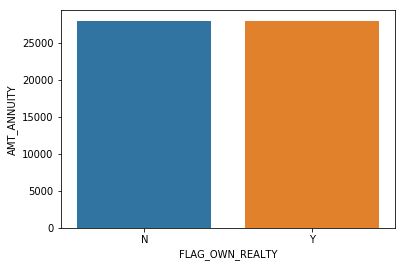

In [367]:
plot_cat('FLAG_OWN_REALTY','AMT_ANNUITY')

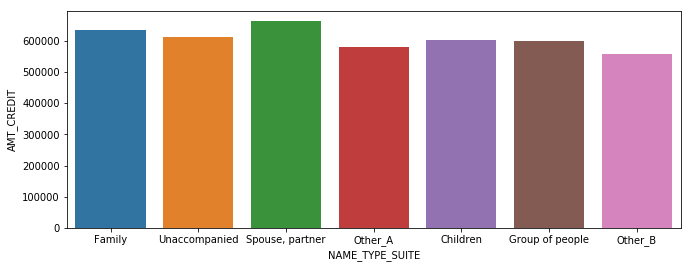

In [378]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_CREDIT')

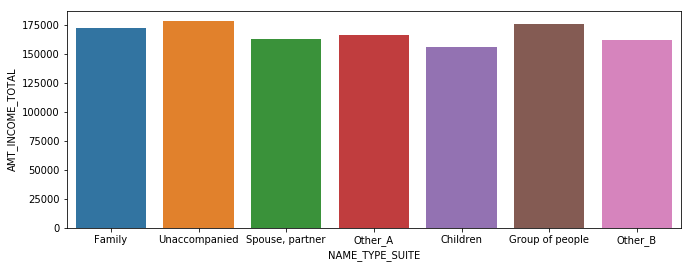

In [379]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_INCOME_TOTAL')

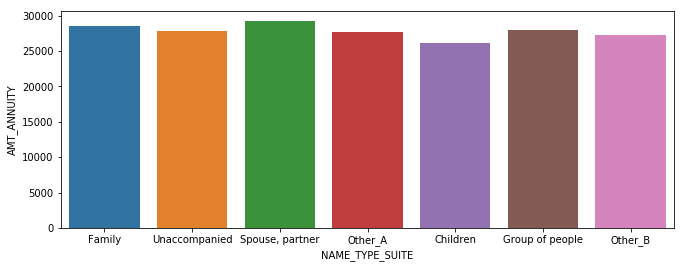

In [376]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_ANNUITY')

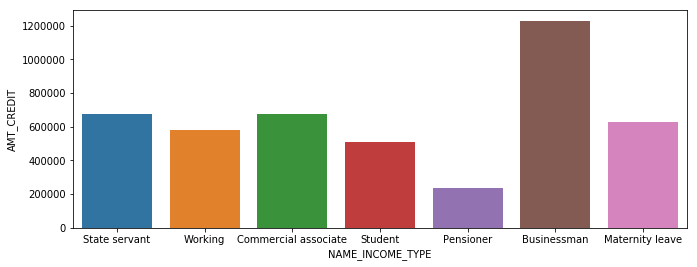

In [380]:
#NAME_INCOME_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_CREDIT')

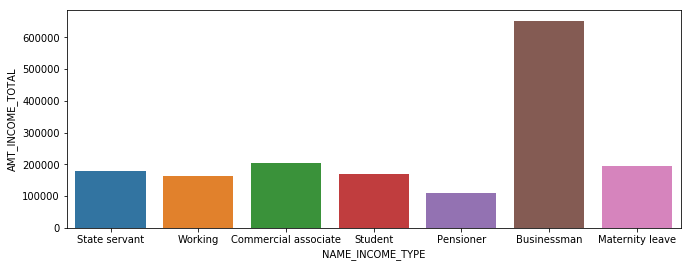

In [381]:
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_INCOME_TOTAL')

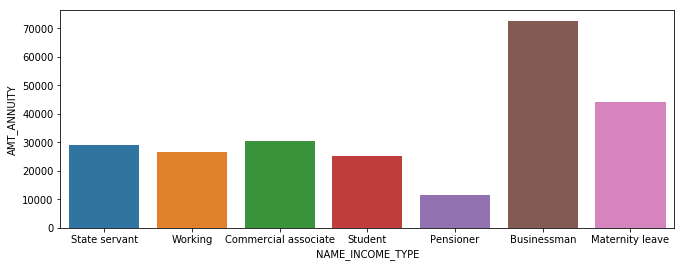

In [382]:
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_ANNUITY')

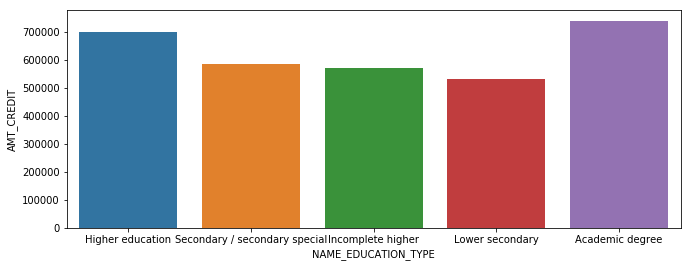

In [383]:
#NAME_EDUCATION_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_CREDIT')

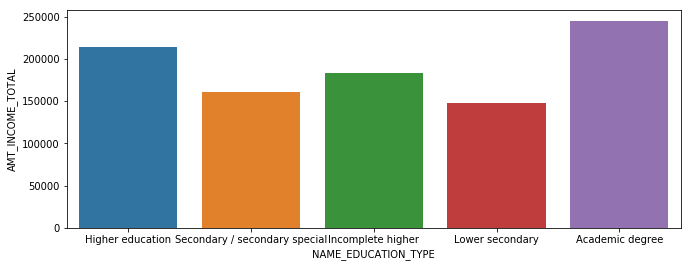

In [384]:
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL')

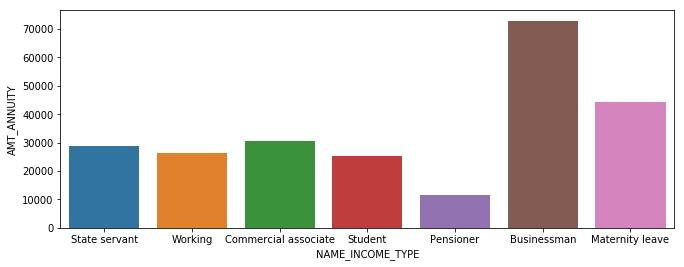

In [385]:
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_ANNUITY')

In [78]:
pd.crosstab(df.TARGET, df.CODE_GENDER, dropna=False)

CODE_GENDER,F,M,XNA
TARGET,,,
0,188278,94404,4
1,14170,10655,0


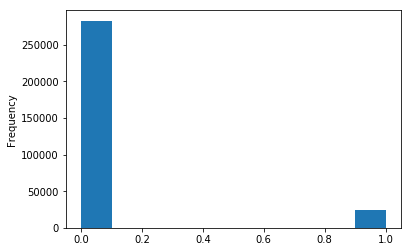

In [79]:
df['TARGET'].astype(int).plot.hist();

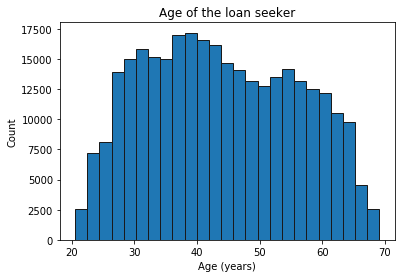

In [85]:
# Plot of the distribution of ages of the loan seeking persons
plt.hist(-(df['DAYS_BIRTH'] / 365), edgecolor = 'k', bins = 25)
plt.title('Age of the loan seeker'); plt.xlabel('Age (years)'); plt.ylabel('Count');

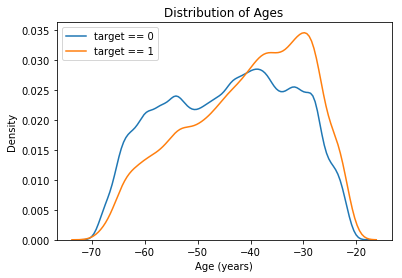

In [86]:
#Plot of loans that were repaid back
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

#Plot of loans that were not repaid back
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [87]:
# Creating a separate Data Frame for further Analysis
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
age_df = df[['TARGET', 'DAYS_BIRTH']]
age_df['YEARS_BIRTH'] = age_df['DAYS_BIRTH'] / 365

age_df['YEARS_BINNED'] = pd.cut(age_df['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_df.head(15)

C:\Users\somya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\somya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [88]:
# GroupBy Operation
age_groupby  = age_df.groupby('YEARS_BINNED').mean()
age_groupby

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


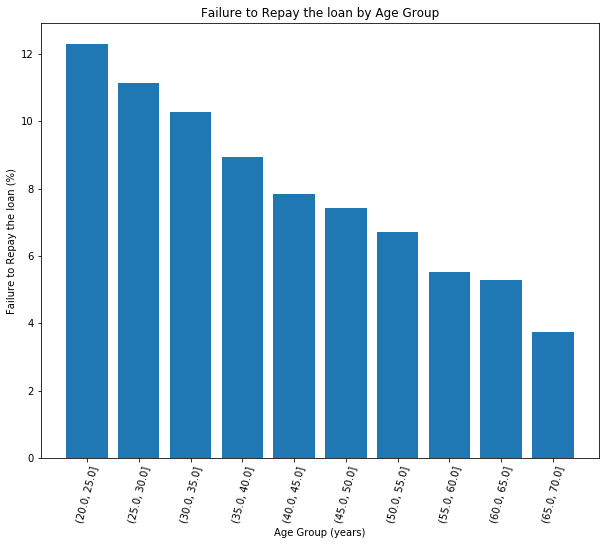

In [89]:
#Plot of the Groupby Data
plt.figure(figsize = (10, 8))
plt.bar(age_groupby.index.astype(str), 100 * age_groupby['TARGET'])

plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay the loan (%)')
plt.title('Failure to Repay the loan by Age Group');

In [90]:
pd.crosstab(df.CNT_CHILDREN, df.CNT_FAM_MEMBERS, dropna=False)

CNT_FAM_MEMBERS,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,20.0
CNT_CHILDREN,,,,,,,,,,,,,,,,,
0,67847,147522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,10835,50284,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2317,24432,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,265,3452,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,26,403,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,5,79,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,2,19,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0


In [91]:
pd.crosstab(df.NAME_TYPE_SUITE, df.NAME_FAMILY_STATUS, dropna=False)

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_TYPE_SUITE,,,,,,
Children,253,1940,318,378,0,378
Family,3702,28617,1747,4150,0,1933
Group of people,29,165,20,44,0,13
Other_A,147,340,70,268,0,41
Other_B,171,854,132,486,0,127
"Spouse, partner",1247,9685,74,345,0,19
Unaccompanied,24112,154047,17334,39529,0,13504


In [92]:
df.groupby(['NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count']})

AMT_INCOME_TOTAL                  
                                 mean    median   count
NAME_INCOME_TYPE                                       
Businessman             652500.000000  495000.0      10
Commercial associate    202955.327289  180000.0   71617
Maternity leave         140400.000000   90000.0       5
Pensioner               136401.292273  117000.0   55362
State servant           179737.969506  157500.0   21703
Student                 170500.000000  157500.0      18
Unemployed              110536.363636   78750.0      22
Working                 163169.889223  135000.0  158774

In [93]:
s = pd.crosstab(df.NAME_INCOME_TYPE, df.OCCUPATION_TYPE, dropna=False).style.background_gradient(cmap='viridis', low=.5, high=0).highlight_null('red')
s

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
NAME_INCOME_TYPE,,,,,,,,,,,,,,,,,,
Businessman,0,0,0,1,0,0,0,0,0,0,7,0,0,0,0,0,0,0
Commercial associate,3970,892,1305,6528,4916,220,3495,204,12763,370,8916,1036,989,324,11104,343,1559,386
Maternity leave,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Pensioner,0,2,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
State servant,729,261,453,6956,815,64,1033,55,1868,25,2142,2585,38,9,186,264,380,53
Student,1,0,0,3,1,0,0,0,5,2,0,0,0,0,0,0,0,1
Working,5112,3498,4188,14080,12871,279,6852,267,40548,1696,10306,4915,1625,418,20811,698,4782,908


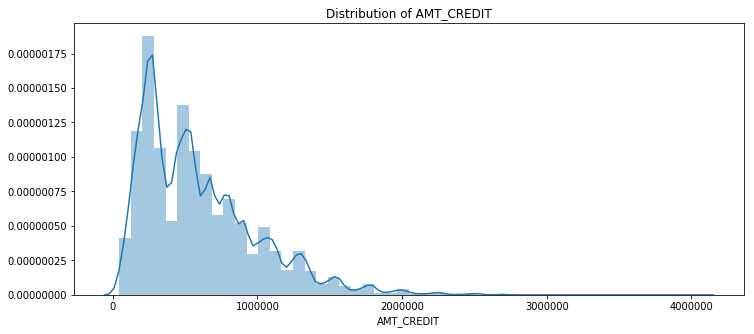

In [94]:
# Plotiing the Distribution of Credit Amounts
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(df["AMT_CREDIT"])

In [95]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

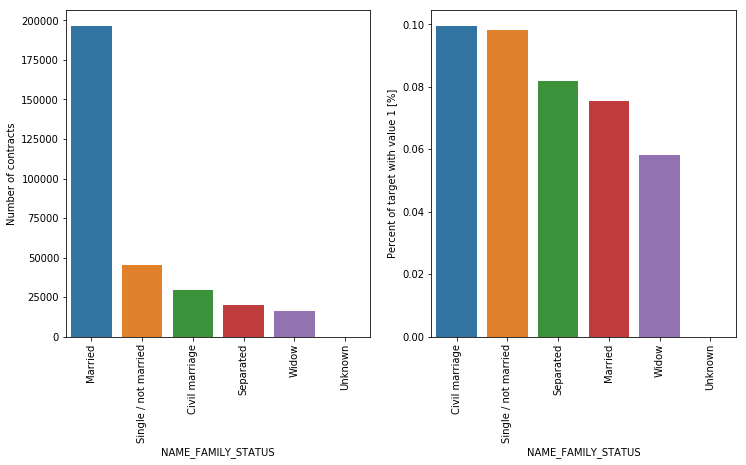

In [96]:
# Plot of Bars representing Family Status
plot_stats('NAME_FAMILY_STATUS',True, True)

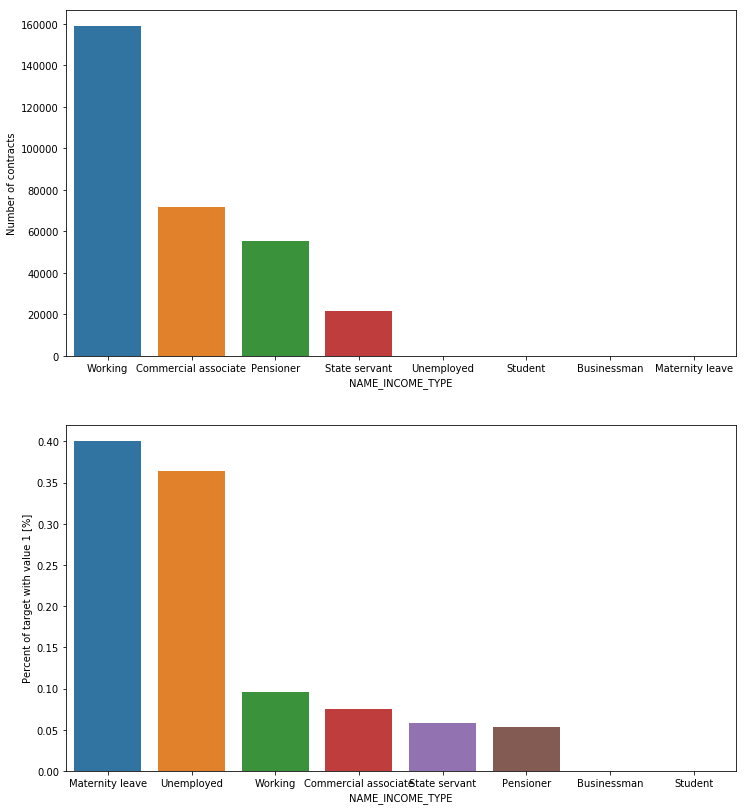

In [97]:
# Plot of Bars representing Income Type
plot_stats('NAME_INCOME_TYPE',False,False)

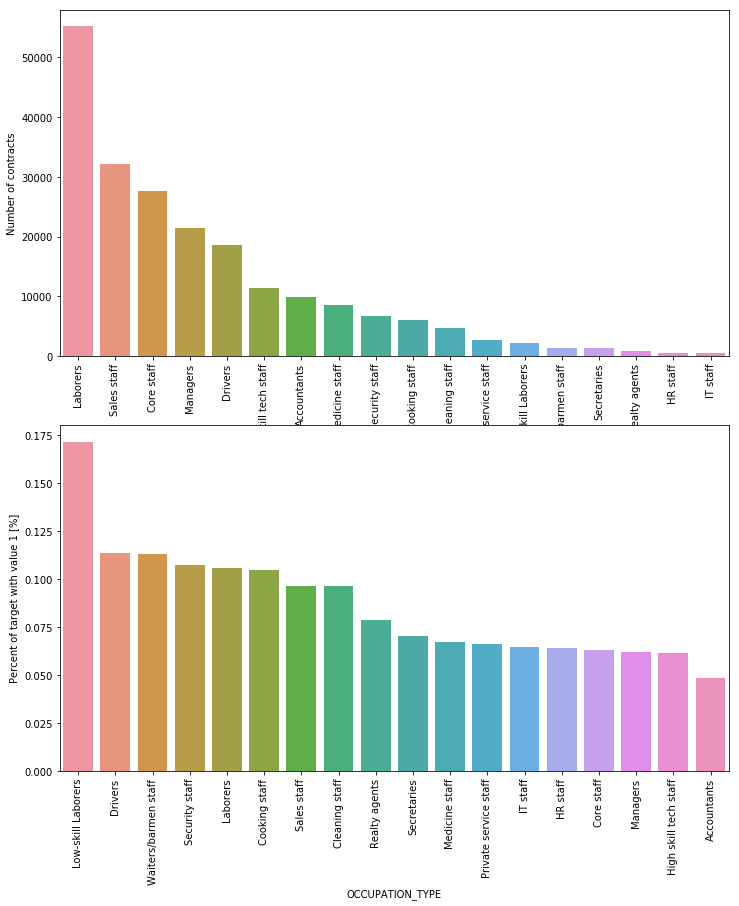

In [98]:
# Plot of Bars representing Occupation Types
plot_stats('OCCUPATION_TYPE',True, False)

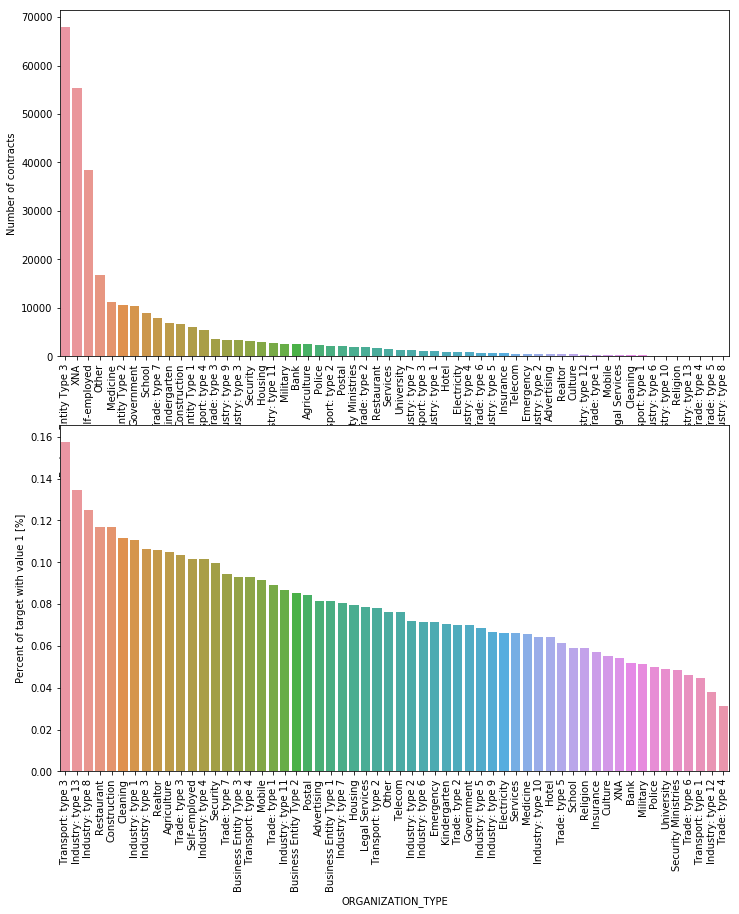

In [99]:
# Plot of Bars representing Types of Organizations
plot_stats('ORGANIZATION_TYPE',True, False)

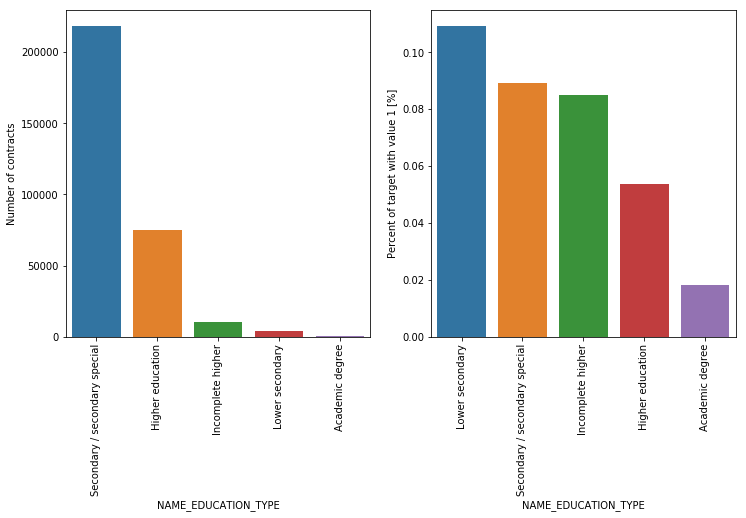

In [100]:
# Plot of Bars representing Education Levels
plot_stats('NAME_EDUCATION_TYPE',True)

Text(0.5, 1.0, 'Counts of housing type')

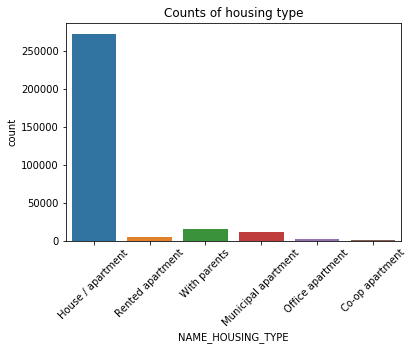

In [101]:
sns.countplot(df['NAME_HOUSING_TYPE']);
plt.xticks(rotation=45);
plt.title('Counts of housing type')

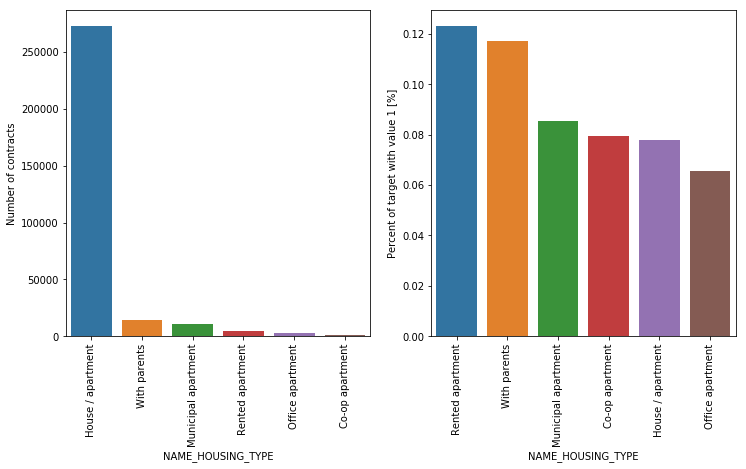

In [102]:
# Plot of Bars representing Loans taken for types of housing
plot_stats('NAME_HOUSING_TYPE',True)

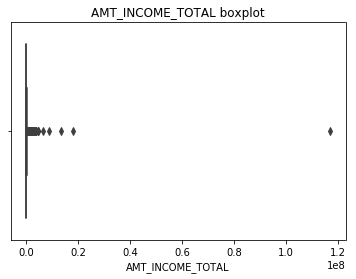

In [103]:
sns.boxplot(df['AMT_INCOME_TOTAL']);
plt.title('AMT_INCOME_TOTAL boxplot');

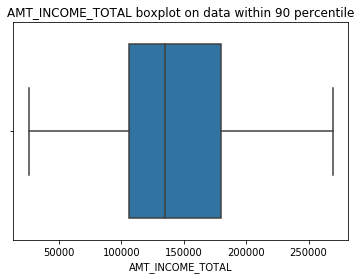

In [104]:
sns.boxplot(df[df['AMT_INCOME_TOTAL'] < np.percentile(df['AMT_INCOME_TOTAL'], 90)]['AMT_INCOME_TOTAL']);
plt.title('AMT_INCOME_TOTAL boxplot on data within 90 percentile');

In [105]:
df.groupby('TARGET').agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count']})

AMT_INCOME_TOTAL                  
                   mean    median   count
TARGET                                   
0         169077.722266  148500.0  282686
1         165611.760906  135000.0   24825

In [106]:
# Common Distribution Function for features 
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(df[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

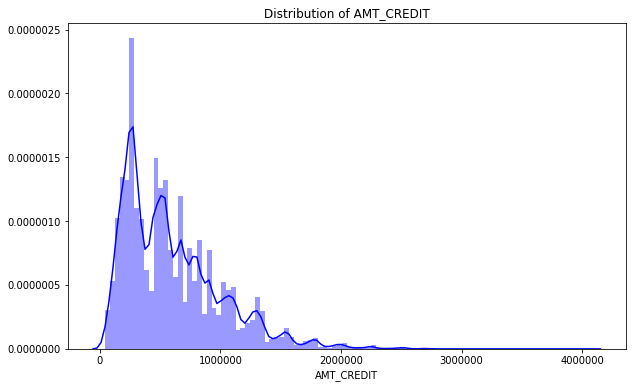

In [107]:
#Plot of Credit Distribution
plot_distribution('AMT_CREDIT','blue')

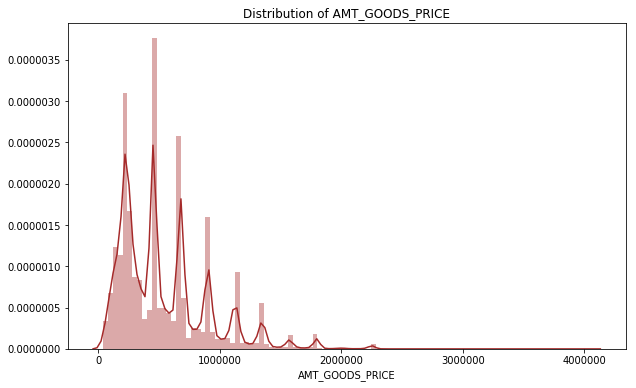

In [108]:
#Plot of Amount(Price)
plot_distribution('AMT_GOODS_PRICE','brown')

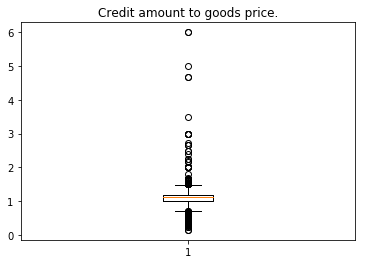

In [109]:
non_zero_good_price = df[df['AMT_GOODS_PRICE'].isnull() == False]
credit_to_good_price = non_zero_good_price['AMT_CREDIT'] / non_zero_good_price['AMT_GOODS_PRICE']
plt.boxplot(credit_to_good_price);
plt.title('Credit amount to goods price.');

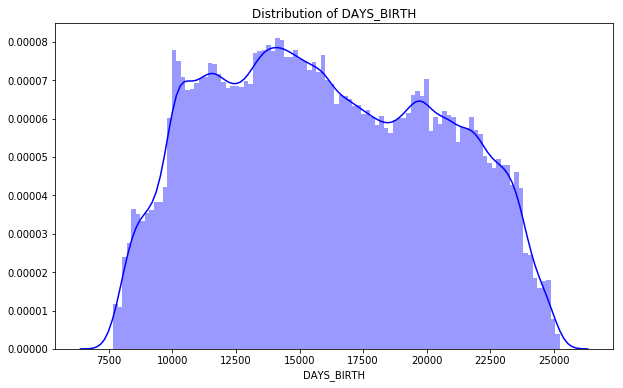

In [110]:
# Plotted Distribution of Age (in Days). The negative value show that the Date of Birth is in the past. (As Expected) 
plot_distribution('DAYS_BIRTH','blue')

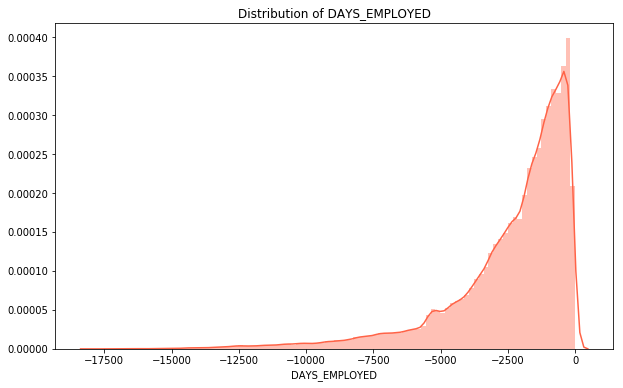

In [111]:
# Plotted Distribution of Employment in Days
plot_distribution('DAYS_EMPLOYED','tomato')

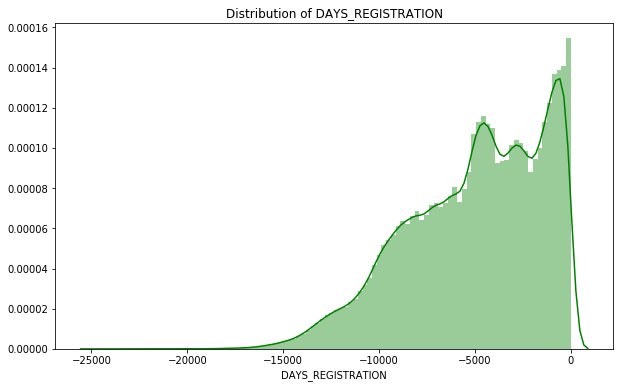

In [112]:
# Distribution for days, since registration for Loan 
plot_distribution('DAYS_REGISTRATION','green')